In [3]:
import pandas as pd 
import numpy as np 

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):   
    for filename in filenames:        
        print(os.path.join(dirname, filename))

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
df = pd.read_csv("data.csv") 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [15]:
question_marks_count = (df == "?").sum().reset_index()
question_marks_count.columns = ["columns", "No_of_columns?"]
question_marks_count

,columns,No_of_columns?
0,age,0
1,sex,0
2,cp,0
3,trestbps,1
4,chol,23
5,fbs,8
6,restecg,1
7,thalach,1
8,exang,1
9,oldpeak,0


In [19]:
df_cleaned = df.drop(columns=["slope","ca","thal"])
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [21]:
df_cleaned.dtypes

age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
num             int64
dtype: object

In [27]:
df_cleaned = df_cleaned.replace("?",np.nan)
df_cleaned.isnull().sum()

age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64

In [29]:
df_cleaned.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
for col in ["trestbps","thalach"]:
    df_cleaned[col] =  df_cleaned[col].astype(float)
    df_cleaned[col].fillna(df_cleaned[col].mean(), inplace = True)

for col in ["restecg","fbs", "exang"]:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace = True)

for col in ["chol"]:
    df_cleaned["chol"] = df_cleaned["chol"].astype(float)
    df_cleaned["chol"].fillna(df_cleaned["chol"].median(), inplace=True)
    

In [47]:
df_cleaned.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [49]:
df_cleaned.describe()

,age,sex,cp,trestbps,chol,thalach,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.234694,139.129693,0.586054,0.360544
std,7.811812,0.447533,0.965117,17.596463,64.982245,23.549459,0.908648,0.480977
min,28.000000,0.000000,1.000000,92.000000,85.000000,82.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.250000,122.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,140.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,155.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [55]:
def numerical_quality_report(df, numeric_cols): 
    report = []    
    for col in numeric_cols:        
        series = df_cleaned[col]        
        report.append({         
            "Feature": col,
            "Count": series.count(),
            "% Miss.": round(series.isna().mean() * 100, 2),
            "Card.": series.nunique(dropna=True),
            "Min": series.min(),
            "1st Qrt.": series.quantile(0.25),
            "Mean": series.mean(),
            "Median": series.median(),
            "3rd Qrt.": series.quantile(0.75),
            "Max": series.max(),
            "Std. Dev.": series.std()
        })
    return pd.DataFrame(report)
        

In [57]:
numeric_cols = [
"age", "trestbps", "chol", "thalach", "oldpeak"
]
num_quality = numerical_quality_report(df_cleaned, numeric_cols)
num_quality

,Feature,Count,% Miss.,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,age,294,0.0,38,28.0,42.00,47.826531,49.0,54.0,66.0,7.811812
1,trestbps,294,0.0,32,92.0,120.00,132.583618,130.0,140.0,200.0,17.596463
2,chol,294,0.0,153,85.0,211.25,250.234694,243.0,277.0,603.0,64.982245
3,thalach,294,0.0,72,82.0,122.00,139.129693,140.0,155.0,190.0,23.549459
4,oldpeak,294,0.0,10,0.0,0.00,0.586054,0.0,1.0,5.0,0.908648


In [61]:
def categorical_quality_report(df, cat_cols):
    report = []
    
    for col in cat_cols:
        series = df[col]
        value_counts = series.value_counts(dropna=True)
        
        mode = value_counts.index[0] if len(value_counts) > 0 else np.nan
        mode_freq = value_counts.iloc[0] if len(value_counts) > 0 else 0

        second_mode = value_counts.index[1] if len(value_counts) > 1 else np.nan
        second_freq = value_counts.iloc[1] if len(value_counts) > 1 else 0

        report.append({
            "Feature": col,
            "Count": series.count(),
            "% Miss.": round(series.isna().mean() * 100, 2),
            "Card.": series.nunique(dropna=True),
            "Mode": mode,
            "Mode Freq.": mode_freq,
            "Mode %": round(mode_freq / len(series) * 100, 2),
            "2nd Mode": second_mode,
            "2nd Mode Freq.": second_freq,
            "2nd Mode %": round(second_freq / len(series) * 100, 2)
})
    return pd.DataFrame(report)

In [71]:
categorical_cols = [
"sex", "cp", "fbs", "restecg", "exang"
]
cat_quality = categorical_quality_report(df_cleaned, categorical_cols)
cat_quality

,Feature,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,sex,294,0.0,2,1,213,72.45,0,81,27.55
1,cp,294,0.0,4,4,123,41.84,2,106,36.05
2,fbs,294,0.0,2,0,274,93.20,1,20,6.80
3,restecg,294,0.0,3,0,236,80.27,1,52,17.69
4,exang,294,0.0,2,0,205,69.73,1,89,30.27


In [73]:
display(num_quality.round(2))
display(cat_quality.round(2))

,Feature,Count,% Miss.,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
0,age,294,0.0,38,28.0,42.00,47.83,49.0,54.0,66.0,7.81
1,trestbps,294,0.0,32,92.0,120.00,132.58,130.0,140.0,200.0,17.60
2,chol,294,0.0,153,85.0,211.25,250.23,243.0,277.0,603.0,64.98
3,thalach,294,0.0,72,82.0,122.00,139.13,140.0,155.0,190.0,23.55
4,oldpeak,294,0.0,10,0.0,0.00,0.59,0.0,1.0,5.0,0.91


,Feature,Count,% Miss.,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,sex,294,0.0,2,1,213,72.45,0,81,27.55
1,cp,294,0.0,4,4,123,41.84,2,106,36.05
2,fbs,294,0.0,2,0,274,93.20,1,20,6.80
3,restecg,294,0.0,3,0,236,80.27,1,52,17.69
4,exang,294,0.0,2,0,205,69.73,1,89,30.27


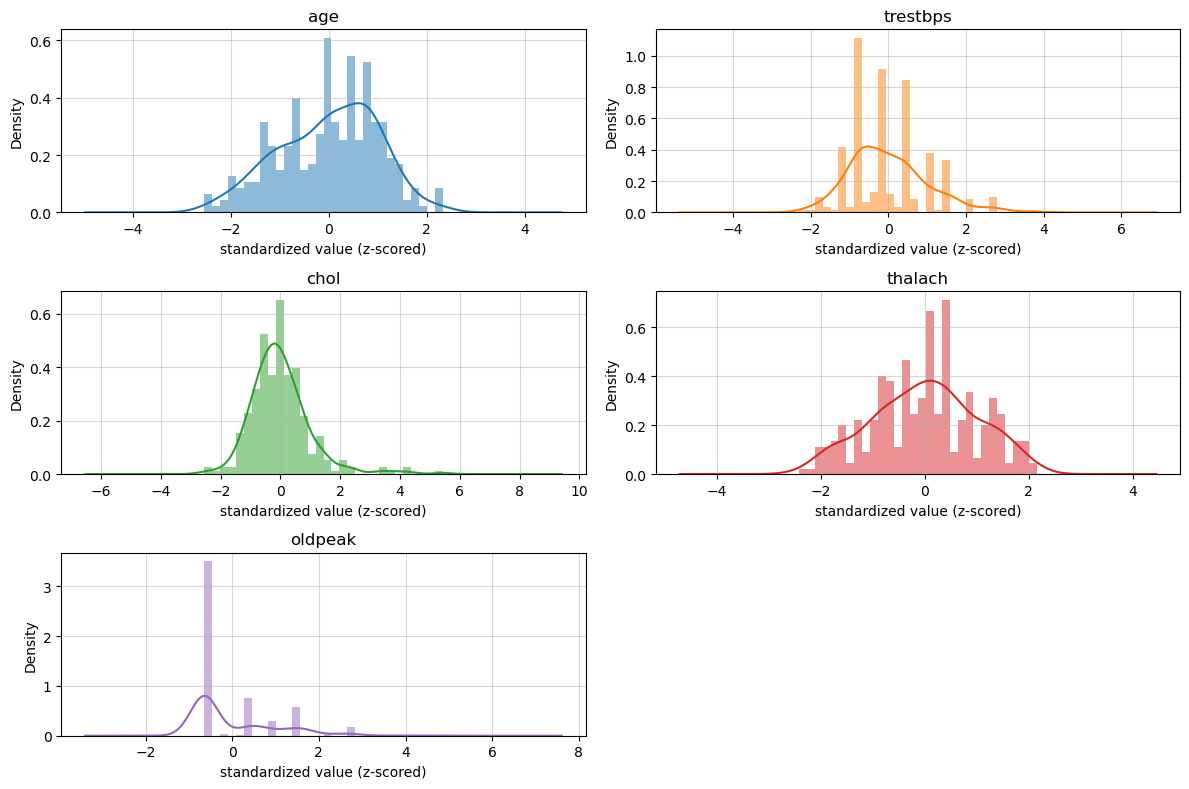

In [87]:
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
# Ensure numeric
df_num = df_cleaned[numeric_cols].apply(pd.to_numeric, errors="coerce")
# Standardize (z-score)
df_scaled = (df_num - df_num.mean()) / df_num.std()
# Subplot layout
n = len(numeric_cols)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (12,8))
axes = axes.flatten()

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

for i, col in enumerate (numeric_cols):
    s = df_scaled[col].dropna()

    #Histogram
    axes[i].hist(s, bins = 30, density = 30, alpha = 0.5, color=colors[i])

    #KDE Curve
    s.plot(kind = "density", ax = axes[i], color=colors[i])

    axes[i].set_title(col)
    axes[i].set_xlabel("standardized value (z-scored)")
    axes[i].set_ylabel("Density")
    axes[i].grid(True, alpha = 0.5)

#Remove unused axes
for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


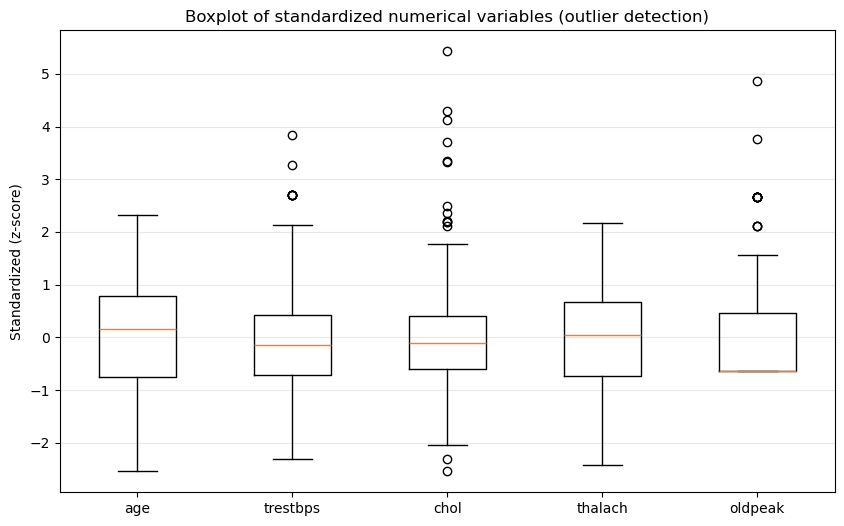

In [105]:
numeric_cols = ["age","trestbps","chol","thalach","oldpeak"]

df_num = df_cleaned[numeric_cols].apply(pd.to_numeric,errors="coerce")

df_scaled = (df_num - df_num.mean()) / df_num.std()


plt.figure(figsize=(10, 6))
plt.boxplot(df_scaled.dropna().values,labels = numeric_cols,vert = True,showfliers=True)
plt.title("Boxplot of standardized numerical variables (outlier detection)")
plt.ylabel("Standardized (z-score)")
plt.grid(axis="y",alpha=0.3)
plt.show()

In [107]:
outlier_summary = []
for col in numeric_cols:
    Q1 = df_num[col].quantile(0.25)
    Q3 = df_num[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    n_outliers = ((df_num[col] < lower) | (df_num[col] > upper)).sum()
    outlier_summary.append({
    "Feature":col,
    "Outliers": n_outliers
})
pd.DataFrame(outlier_summary)

,Feature,Outliers
0,age,0
1,trestbps,8
2,chol,14
3,thalach,0
4,oldpeak,11


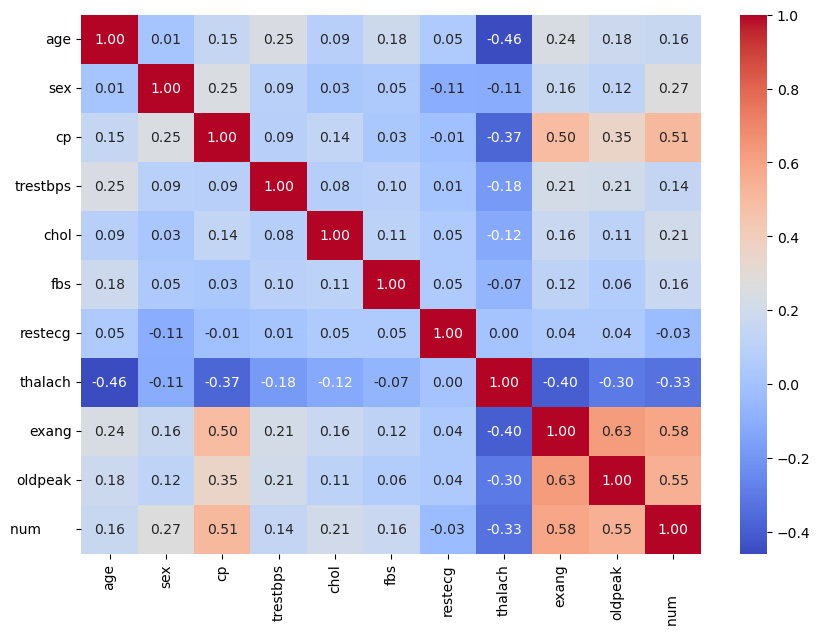

In [109]:
cols_to_fix = ["fbs","restecg","exang"]
for col in cols_to_fix:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col],errors="coerce")
plt.figure(figsize=(10,7))
sns.heatmap(df_cleaned.corr(), annot= True, fmt=".2f", cmap="coolwarm")
plt.show()

In [111]:
df_cleaned.columns.tolist()


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'num       ']

In [123]:
df_cleaned = df_cleaned.rename(columns={'num       ':'num'})
df_cleaned.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num'],
      dtype='object')

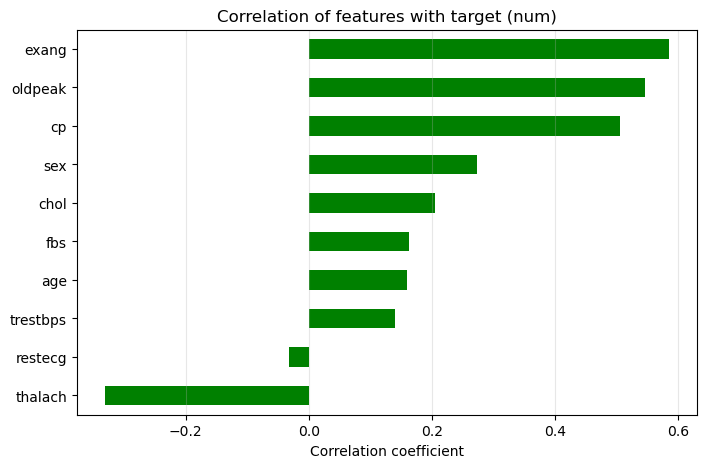

In [125]:
corr = df_cleaned.corr()

target_corr = corr["num"].drop("num").sort_values()

plt.figure(figsize=(8, 5))
target_corr.plot(kind="barh", color = "Green")
plt.title("Correlation of features with target (num)")
plt.xlabel("Correlation coefficient")
plt.grid(axis="x", alpha=0.3)
plt.show()

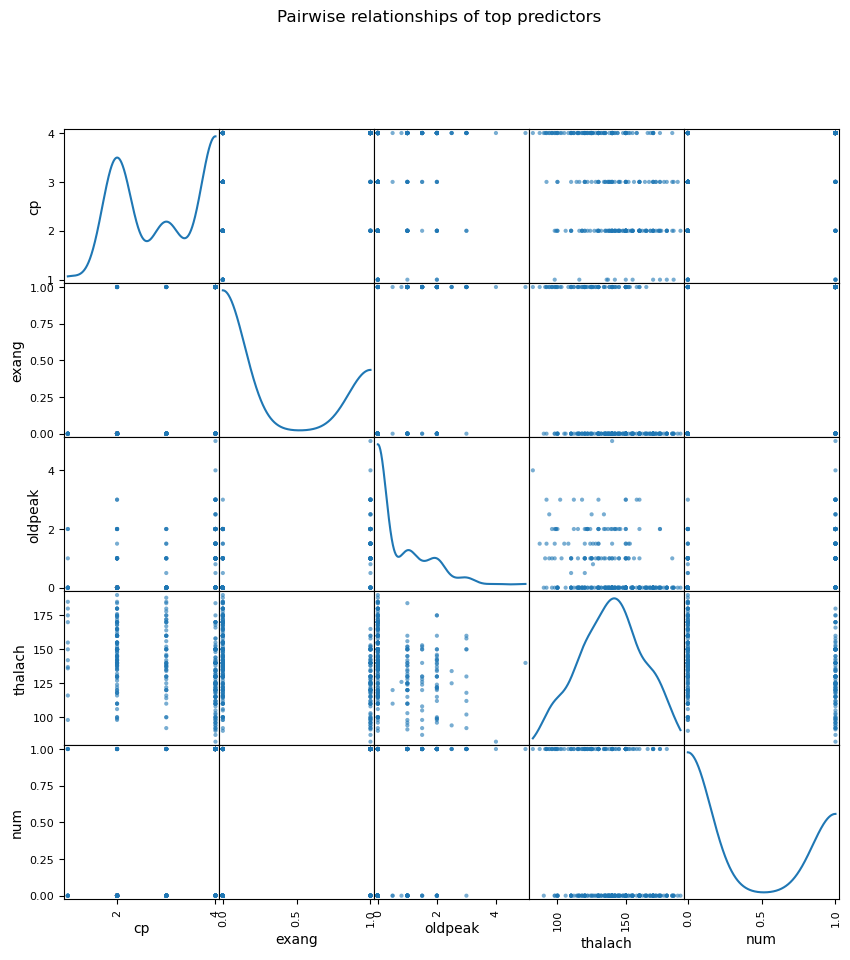

In [127]:
top_features = ["cp","exang","oldpeak","thalach"]
pd.plotting.scatter_matrix(
    df_cleaned[top_features + ["num"]],
    figsize=(10,10),
    diagonal="kde",
    alpha=0.6
)
plt.suptitle("Pairwise relationships of top predictors", y=1)
plt.show()

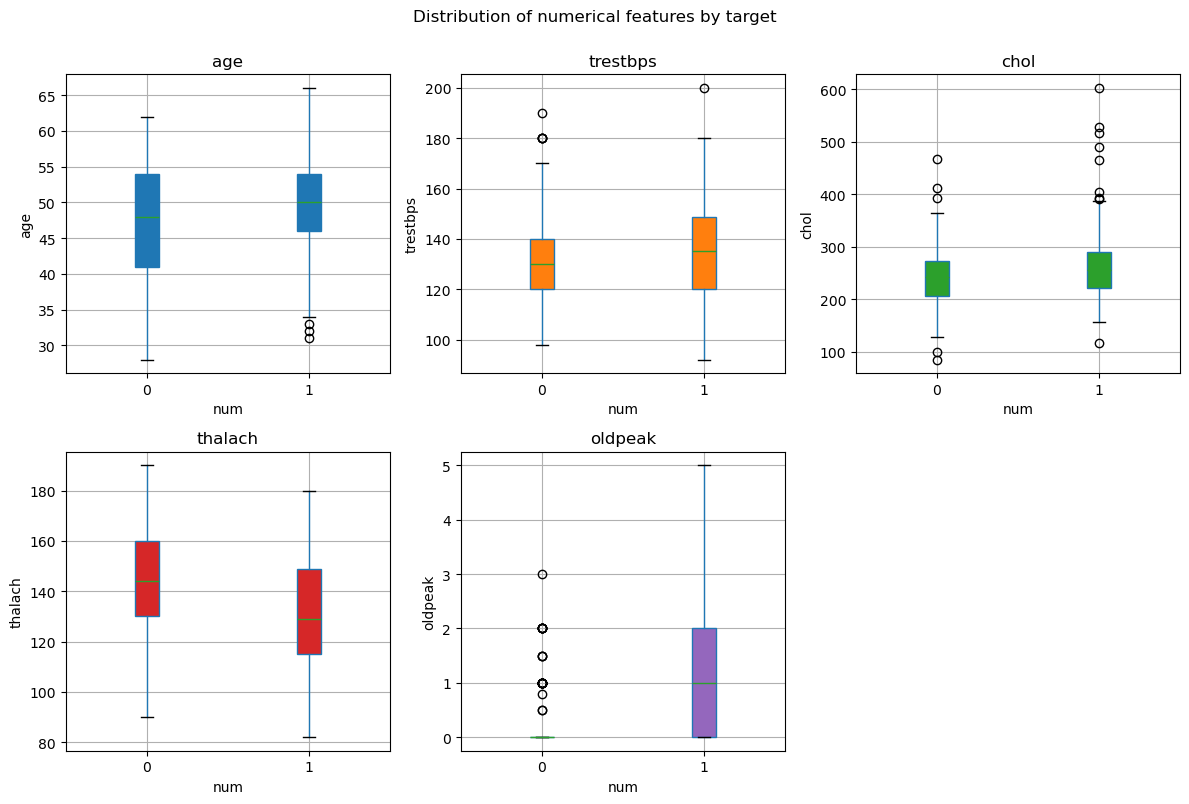

In [129]:
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Create boxplot and capture return value (with patch_artist=True)
    bp = df_cleaned.boxplot(
        column=col,
        by="num",
        ax=axes[i],
        patch_artist=True,
        return_type="dict"
    )

    # Apply one color to all boxes in this subplot
    for patch in bp[col]["boxes"]:
        patch.set_facecolor(colors[i])

    axes[i].set_title(col)
    axes[i].set_xlabel("num")
    axes[i].set_ylabel(col)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of numerical features by target", y=1.0)
plt.tight_layout()
plt.show()


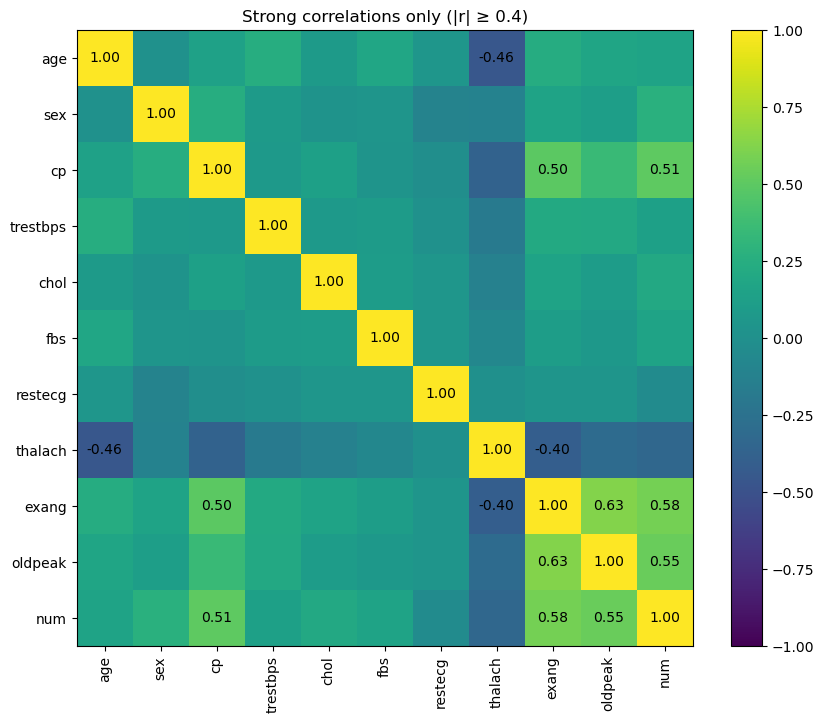

In [145]:
corr_matrix = df_cleaned.corr()

mask = np.abs(corr_matrix) < 0.4

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap="viridis", vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        if not mask.iloc[i, j]:
            plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                ha="center", va="center", color="black")
            
plt.title("Strong correlations only (|r| ≥ 0.4)")
plt.show()

In [149]:
#Preprocessing

X = df_cleaned.drop(columns="num")
y = df_cleaned["num"]
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [151]:
# Model Building

models = {
    "LogReg (L2)": LogisticRegression(max_iter=2000, solver="lbfgs"),
    "KNN":KNeighborsClassifier(n_neighbors=7),
    "SVM (RBF)": SVC(kernel="rbf", probability= True),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42,n_estimators=300),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [165]:
def evaluate_pipeline(pipe, X_train, X_test, y_train, y_test):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    #ROC-AUC Curve
    if hasattr(pipe, "predict_proba"):
        y_score = pipe.predict_proba(X_test)[:, 1]
    elif hasattr(pipe, "decision_function"):
        y_score = pipe.decision_function(X_test)

    results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
}

    if y_score is not None:
        results["ROC-AUC"] = roc_auc_score(y_test, y_score)
    else:
        results["ROC-AUC"] = np.nan
        
    return results

In [167]:
results = []

for name, model in models.items():
    # Pipeline A: StandardScaler + model
    pipe_std = Pipeline([
        ("scaler", StandardScaler()),("model",model)
    ])

    r_std = evaluate_pipeline(pipe_std, X_train, X_test, y_train, y_test)
    r_std.update({"Model":name,"Pipeline":"StandardScaler"})
    results.append(r_std)

    # Pipeline B: RobustScaler + model (oulier-robust)
    pipe_rob = Pipeline([
        ("scaler",RobustScaler()),
        ("model",model)
    ])

    r_rob = evaluate_pipeline(pipe_rob, X_train, X_test, y_train, y_test)
    r_rob.update({"Model":name,"Pipeline":"RobustScaler"})
    results.append(r_rob)

comparison_table = pd.DataFrame(results)
comparison_table = comparison_table[["Model", "Pipeline", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"]]
comparison_table.sort_values(by=["ROC-AUC", "F1", "Accuracy"], ascending=False)

,Model,Pipeline,Accuracy,Precision,Recall,F1,ROC-AUC
4,SVM (RBF),StandardScaler,0.864407,0.882353,0.714286,0.789474,0.919799
2,KNN,StandardScaler,0.898305,0.857143,0.857143,0.857143,0.904135
8,Random Forest,StandardScaler,0.847458,0.800000,0.761905,0.780488,0.904135
9,Random Forest,RobustScaler,0.847458,0.800000,0.761905,0.780488,0.902882
5,SVM (RBF),RobustScaler,0.813559,0.857143,0.571429,0.685714,0.893484
1,LogReg (L2),RobustScaler,0.864407,0.842105,0.761905,0.800000,0.887218
0,LogReg (L2),StandardScaler,0.847458,0.800000,0.761905,0.780488,0.880952
12,Naive Bayes,StandardScaler,0.881356,0.818182,0.857143,0.837209,0.873434
13,Naive Bayes,RobustScaler,0.881356,0.818182,0.857143,0.837209,0.873434
3,KNN,RobustScaler,0.847458,0.875000,0.666667,0.756757,0.869674
